
**LAB 6**

**Exercise:**
Try logistic regression on BuyComputer dataset and set Random state=Your_RollNumber (last 3 digit of ID, incase if you don't have ID)

In [35]:
import numpy as np 
import pandas as pd 
import io
import matplotlib.pyplot as plt

data = pd.read_csv('/content/BuyComputer.csv')

data.drop(columns=['User ID',],axis=1,inplace=True)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [36]:
#Declare label as last column in the source file
y = data.iloc[:,-1].values
#Declaring X as all columns excluding last
X = data.iloc[:,:-1].values

#print(X)
#print(y)

In [37]:
# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 142)

# Sacaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
y_pred = []
len_x = len(X_train[0])
w = []
b = 0.2
print(len_x)

2


In [39]:
entries = len(X_train[:,0])
print(entries)

for weights in range(len_x):
    w.append(0)
print(w)

300
[0, 0]


In [40]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def predict(inputs):
    z = np.dot(w,inputs)+b
    a = sigmoid(z)
    return a

def loss_func(y,a):
    J = -(y*np.log(a) + (1-y)*np.log(1-a))
    return J 

In [41]:
dw = []
db = 0
J = 0
alpha = 0.1
for x in range(len_x):
    dw.append(0)

In [42]:
#Repeating this process 1000 times
for iterations in range(1000):
    for i in range(entries):
        localx = X_train[i]
        a = predict(localx)   
        dz = a - y_train[i]
        J += loss_func(y_train[i],a)
        for j in range(len_x):
            dw[j] = dw[j]+(localx[j]*dz)
        db += dz
    J = J/entries
    db = db/entries 
    for x in range(len_x):
        dw[x]=dw[x]/entries
    for x in range(len_x):
        w[x] = w[x]-(alpha*dw[x])
    b = b-(alpha*db)         
    J=0

In [43]:
print(w)
print(b)

[2.6355669936878874, 1.2284767892702433]
-1.0771011981687983


In [44]:
#predicting the label
for x in range(len(y_test)):
    y_pred.append(predict(X_test[x]))

In [45]:
#print actual and predicted values in a table
for x in range(len(y_pred)):
    print('Actual ',y_test[x],' Predicted ',y_pred[x])
    if y_pred[x]>=0.5:
        y_pred[x]=1
    else:
        y_pred[x]=0

Actual  1  Predicted  0.9954477084502079
Actual  1  Predicted  0.3240367250153078
Actual  0  Predicted  0.03804568266154107
Actual  0  Predicted  0.8678893628458585
Actual  0  Predicted  0.31985325345521864
Actual  0  Predicted  0.2984339774813584
Actual  0  Predicted  0.0012031264992434063
Actual  0  Predicted  0.7418892599276976
Actual  0  Predicted  0.7405764560549165
Actual  0  Predicted  0.003519618527671478
Actual  1  Predicted  0.9412091969462254
Actual  0  Predicted  0.059531739186979835
Actual  0  Predicted  0.0029630981164464314
Actual  0  Predicted  0.24849748869757482
Actual  0  Predicted  0.02427707951499051
Actual  0  Predicted  0.4936465241743478
Actual  1  Predicted  0.5367486862106229
Actual  0  Predicted  0.050305812598315326
Actual  0  Predicted  0.32194142036122786
Actual  1  Predicted  0.4469136943994363
Actual  0  Predicted  0.036646768639387435
Actual  0  Predicted  0.005407849028272063
Actual  1  Predicted  0.5096805322863863
Actual  0  Predicted  0.269044187824

In [46]:
# Calculating accuracy
count = 0
for x in range(len(y_pred)):
    if(y_pred[x]==y_test[x]):
        count=count+1
print('Accuracy:',(count/(len(y_pred)))*100)

Accuracy: 83.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


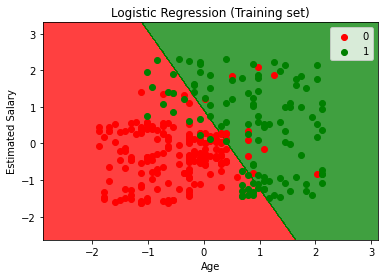

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


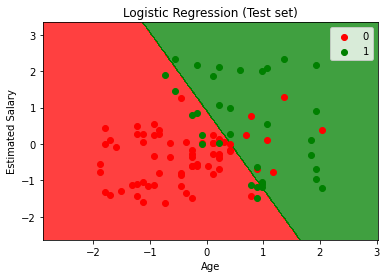

In [47]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)

#predicting the test label with LR. Predict always takes X as input
y_pred=LR.predict(X_test)

#Accuracy Calculation:
#Compare accuracy of Sklearn with your previous output

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LR.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LR.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()